In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "C:/Users/user/Downloads/StudentsAnalysis"
lesson = pd.read_csv(path + "/Lesson completion.csv")
attendance = pd.read_csv(path + "/Pupil attendance.csv")
score = pd.read_csv(path + "/Pupil scores.csv")
info = pd.read_csv(path + "/School_information.csv")

In [7]:
score.head()

,school_id,pupil_id,grade,subject,score
0,35175,1,Grade 1,Fluency,65.0
1,35175,1,Grade 1,Kiswahili,1.0
2,35175,1,Grade 1,Math,1.0
3,40580,7,Grade 2,Math,1.0
4,40580,7,Grade 2,Kiswahili,1.0


In [13]:
result_df = score.pivot_table(index=['school_id', 'pupil_id', 'grade'], columns='subject', values='score', fill_value=0).reset_index()

In [14]:
result_df.head()

subject,school_id,pupil_id,grade,Fluency,Kiswahili,Math
0,416,344,Grade 2,41,1,0
1,416,354,Grade 2,47,1,1
2,416,1430,Grade 1,20,0,0
3,416,1642,Grade 5,68,1,1
4,416,1980,Grade 1,40,0,1


In [27]:
df = pd.merge(result_df, lesson, left_on=['school_id', 'grade'], right_on=['school_id', 'grade'], how='inner')


In [29]:
df1 = pd.merge(df,attendance, left_on=['school_id','pupil_id','grade'],right_on=["school_id",'pupil_id','grade'], how='inner')

In [30]:
data = pd.merge(df1,info, left_on='school_id',right_on="school_id", how='inner')

In [31]:
data.head()

,school_id,pupil_id,grade,Fluency,Kiswahili,Math,teacher_id,lesson_completion_rate,attendance_records,present_records,region,province,tutoring_program
0,416,344,Grade 2,41,1,0,202,1,85,77,Kirinyaga,Central,No
1,416,354,Grade 2,47,1,1,202,1,102,90,Kirinyaga,Central,No
2,416,3333,Grade 2,41,1,0,202,1,102,76,Kirinyaga,Central,No
3,416,5690,Grade 2,36,1,1,202,1,102,96,Kirinyaga,Central,No
4,416,5692,Grade 2,40,1,1,202,1,102,82,Kirinyaga,Central,No


In [32]:
MergedData = data

In [33]:
MergedData.to_csv(path+"/MergedData.csv")

CALCULATING KPIS

In [34]:
data["percentage_pupils_present"]  = ((data["present_records"] / data["attendance_records"]) * 100).round(2)

In [37]:
result = data.groupby('school_id')["percentage_pupils_present"].mean().reset_index()
SchoolMeanPercent = pd.DataFrame(result)

In [38]:
SchoolMeanPercent.to_csv(path + "/SchoolMeanPercent.csv")

DESCRIPTIVE ANALYSIS

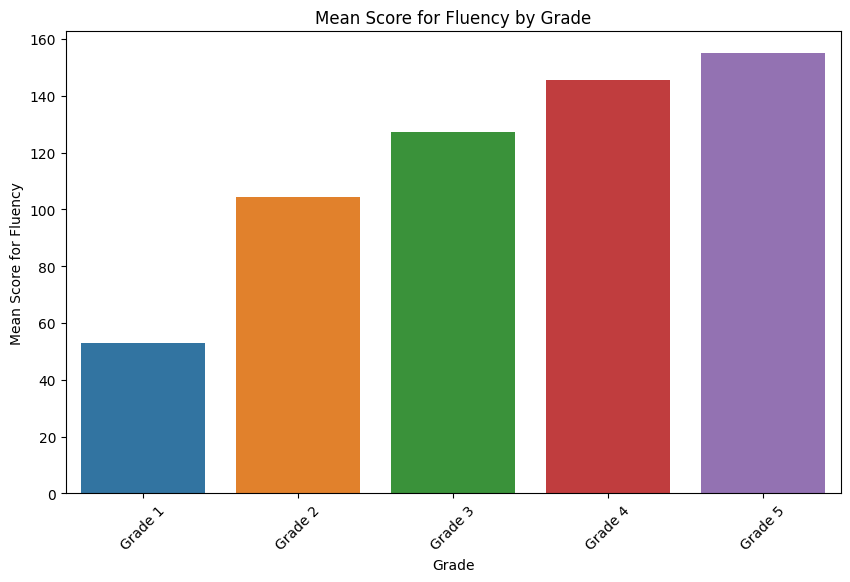

In [39]:
results = score[score['subject'] == 'Fluency'].groupby('grade')['score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=results, x='grade', y='score')
plt.xlabel('Grade')
plt.ylabel('Mean Score for Fluency')
plt.title('Mean Score for Fluency by Grade')
plt.xticks(rotation=45)
plt.show()

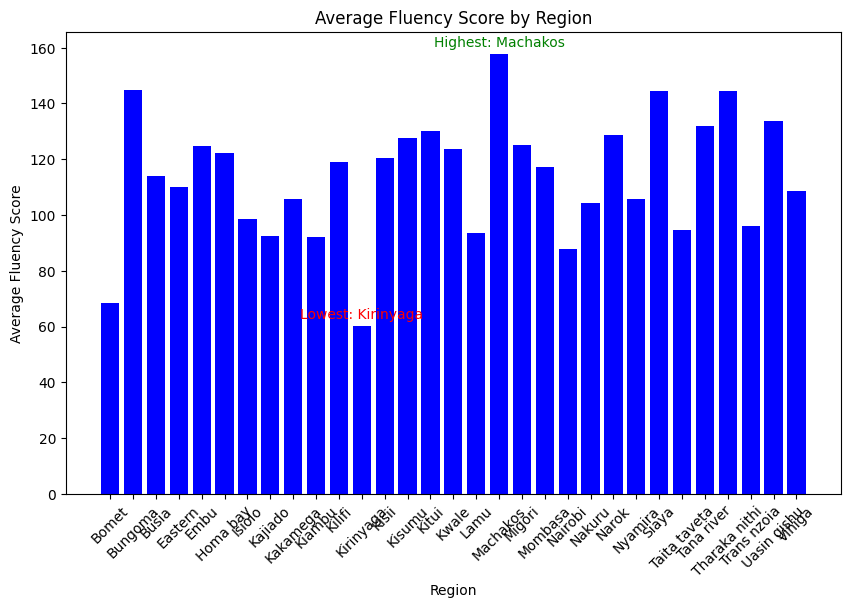

In [40]:
merged_df = pd.merge(score, info[['school_id', 'region']], on='school_id', how='inner')

avg_fluency_by_region = merged_df[merged_df['subject'] == 'Fluency'].groupby('region')['score'].mean().reset_index()

lowest_avg_fluency_region = avg_fluency_by_region.loc[avg_fluency_by_region['score'].idxmin()]
highest_avg_fluency_region = avg_fluency_by_region.loc[avg_fluency_by_region['score'].idxmax()]

plt.figure(figsize=(10, 6))
plt.bar(avg_fluency_by_region['region'], avg_fluency_by_region['score'], color='blue')
plt.xlabel('Region')
plt.ylabel('Average Fluency Score')
plt.title('Average Fluency Score by Region')
plt.xticks(rotation=45) 

plt.annotate(f'Lowest: {lowest_avg_fluency_region["region"]}', 
             xy=(lowest_avg_fluency_region['region'], lowest_avg_fluency_region['score']), 
             xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10, color='red')
plt.annotate(f'Highest: {highest_avg_fluency_region["region"]}', 
             xy=(highest_avg_fluency_region['region'], highest_avg_fluency_region['score']), 
             xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10, color='green')

plt.show()

In [41]:
data["fluency_rate"] = data['Fluency'].apply(lambda x: 1 if x <= 10 else 0)

In [42]:
data.head()

,school_id,pupil_id,grade,Fluency,Kiswahili,Math,teacher_id,lesson_completion_rate,attendance_records,present_records,region,province,tutoring_program,percentage_pupils_present,fluency_rate
0,416,344,Grade 2,41,1,0,202,1,85,77,Kirinyaga,Central,No,90.59,0
1,416,354,Grade 2,47,1,1,202,1,102,90,Kirinyaga,Central,No,88.24,0
2,416,3333,Grade 2,41,1,0,202,1,102,76,Kirinyaga,Central,No,74.51,0
3,416,5690,Grade 2,36,1,1,202,1,102,96,Kirinyaga,Central,No,94.12,0
4,416,5692,Grade 2,40,1,1,202,1,102,82,Kirinyaga,Central,No,80.39,0


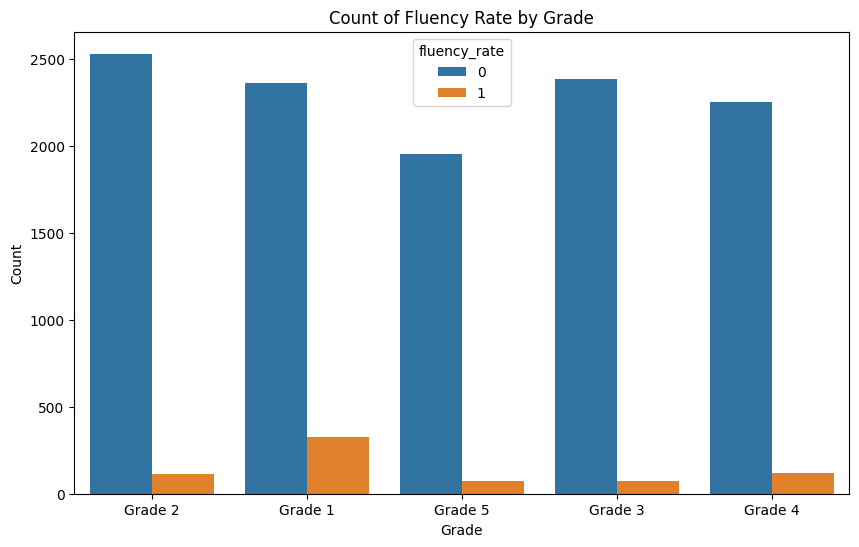

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='grade', hue='fluency_rate')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Count of Fluency Rate by Grade')
plt.show()

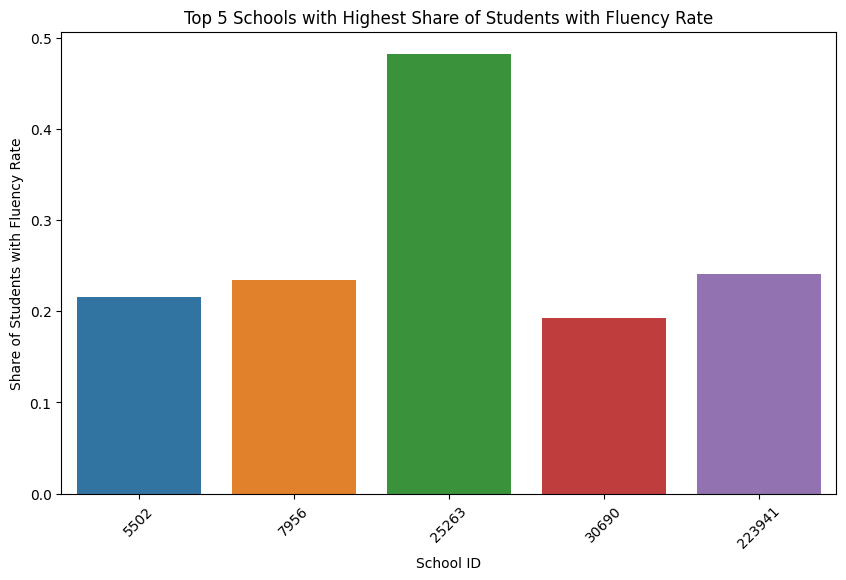

In [47]:
school_counts = data.groupby('school_id')['fluency_rate'].value_counts().unstack(fill_value=0)

school_share = school_counts[1] / (school_counts[0] + school_counts[1])

top_5_schools = school_share.nlargest(5).index

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_schools, y=school_share.loc[top_5_schools])
plt.xlabel('School ID')
plt.ylabel('Share of Students with Fluency Rate')
plt.title('Top 5 Schools with Highest Share of Students with Fluency Rate')
plt.xticks(rotation=45)
plt.show()